In [ ]:
# classified text as ham or spam

# understand the data

In [5]:
message=[line for line in open('smsspamcollection/SMSSpamCollection')]

In [9]:
message[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [22]:
#using rstip to remove the space (\n) to join the text
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [11]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [23]:
for message_n, messages in enumerate(messages[:3]):
    print (message_n, messages)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


# 1

In [24]:
import pandas as pd

In [47]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',
                    sep='\t',names=["label", "message"] )

In [48]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [77]:
messages.groupby('label').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [63]:
messages['len']=messages['message'].apply(len)

In [76]:
messages.groupby('label').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

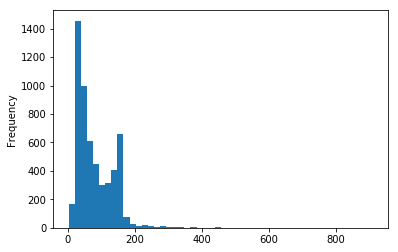

In [67]:
messages['len'].plot(kind='hist',bins=50)

In [71]:
import seaborn as sns

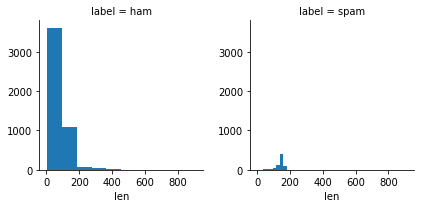

In [74]:
g=sns.FacetGrid(messages,col='label')
g.map(plt.hist,'len')

In [79]:
# remove all punctuations and stopwords

In [80]:
import string

In [81]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
from nltk.corpus import stopwords

In [89]:
stopwords.words('English')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [97]:
def remove_all(ra):
    nopunc=[char for char in ra if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    

In [ ]:
messages['message'].apply(remove_all)

In [101]:
messages.head()

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 2

Now, convert the list of words to a vector that sklearn can use

 count the frequency of each word.
1, i dont know
2, i eat.
in the first vector it will be 1 1 1 0 (i dont know eat)
(1 does not have eat so it is 0)
secind vector = 1 0 0 1

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv=CountVectorizer().fit(messages['message'])

In [108]:
print (len(cv.vocabulary_))

8713


In [ ]:
cv=CountVectorizer(analyzer=remove_all).fit(messages['message'])

In [111]:
print (len(cv.vocabulary_))

11425


In [112]:
# not sure the role of the analyzer

In [113]:
transform_message=cv.transform(messages['message'])

In [117]:
print (transform_message)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [132]:
cv.get_feature_names()[10648]

'true'

# 3

find the weights

In [118]:
# eigh the counts, so that frequent tokens get lower weight

In [119]:
# 10millions documents. in one document contain 100 words, the 
# word ' do' appears 3 times. so the term frequency is 
# 3/100=0.03
# if 'do' appear 1000 times in all these documents,
# the inverse document frequency is log(10million/1000=4)
# thus the tf-idf weight is 0.03*4=0.12

In [120]:
from sklearn.feature_extraction.text import TfidfTransformer

In [121]:
tfidf_fit=TfidfTransformer().fit(transform_message)

In [122]:
tfidf_fit

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [123]:
tfidf_transform=tfidf_fit.transform(transform_message)

In [125]:
print (tfidf_transform)
# the weight of each word

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (1, 7701)	0.376740107081
  (1, 3064)	0.291199541124
  (1, 2451)	0.561988811929
  (2, 11123)	0.191043872205
  (2, 11084)	0.158981453472
  (2, 10686)	0.139955408208
  :	:
  (5568, 6882)	0.313674697762
  (5568, 6691)	0.477810764018
  (5568, 6354)	0.557572104865
  (5568, 4880)	0.385312208609
  (5569, 10199)	0.520467167164
  (5569, 8252)	0.432829970906
  (5569, 3721)	0.520467167164
  (5569, 3228)	0.520467167164
  (5570, 11006)	0.204345259945
  (5570, 10787)	0.228678434865
  (5570, 9

In [231]:
from sklearn.model_selection import train_test_split
X=messages['message']
y=messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 1, Naive bayes classifier algorithm

In [137]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()

In [170]:
nb_model.fit(tfidf_transform, messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [171]:
prediction=nb_model.predict(tfidf_transform)

In [172]:
for index in range(5):
    print(messages['label'][index])


ham
ham
spam
ham
ham


In [149]:
print (len(prediction))

5572


In [173]:
for index in range(5):
    print(prediction[index])


ham
ham
spam
ham
ham


In [164]:
# correctly predict the first 5. are them all correct? 
# try to count how many of each in original and prediction

In [165]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [178]:
print (cm(messages['label'], prediction))
print (cr(messages['label'], prediction))

[[4825    0]
 [ 115  632]]
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [167]:
# if the text is ham, 0.02 chance to predict it as a spam

# logistic regression

In [238]:
from sklearn.linear_model import LogisticRegression
lom=LogisticRegression()

In [208]:
lom.fit(tfidf_transform, messages['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
prediction_lom=lom.predict(tfidf_transform)

In [213]:
print (cm(messages['label'], prediction_lom))
print (cr(messages['label'], prediction_lom))

[[4823    2]
 [ 195  552]]
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      4825
       spam       1.00      0.74      0.85       747

avg / total       0.97      0.96      0.96      5572



In [ ]:
# using train test split

In [239]:
lom_wt=LogisticRegression()

In [240]:
lom_wt.fit(X_train, y_train)

ValueError: could not convert string to float: 'Did he just say somebody is named tampa'

In [185]:
perediction_lom_wt=lom.predict(X_test)

In [193]:
print (cm(y, perediction_lom_wt))
print (cr(y, perediction_lom_wt))

ValueError: Found input variables with inconsistent numbers of samples: [5572, 1839]

In [ ]:
# guess cant use logistic regression for trained data
# it works well using the tranformed data

# KNN

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction=

In [194]:
# skip all above steps and directly using pipeline

In [243]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('cv',CountVectorizer(analyzer=remove_all)),
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB()),
])

In [232]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function remove_all at 0x1a1d5f2c80>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...inear_tf=False, use_idf=True)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [233]:
prediction_pipe=pipe.predict(X_test)

In [234]:
print (cm(y_test, prediction_pipe))
print (cr(y_test, prediction_pipe))

[[1593    0]
 [  65  181]]
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       1.00      0.74      0.85       246

avg / total       0.97      0.96      0.96      1839

